<a href="https://colab.research.google.com/github/IbrahimDarwish/fraud_detection_project/blob/evaluation-Khaled/03_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation Notebook for Fraud Detection Models

This notebook focuses on evaluating a trained fraud detection model with the provided test data (`X_test.csv`, `y_test.csv`).

### Goals:
- Apply rigorous validation metrics (e.g., Precision, Recall, F1, ROC-AUC, PR-AUC).
- Perform error analysis (False Positives/Negatives).
- Analyze why the model made these errors and what patterns or features may  have contributed
- Interpret real-world implications using cost-based analyses.
- Recommend refinements to improve detection accuracy in future iterations.


In [3]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, average_precision_score,
    precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


## Step 2: Load Test Data

Use the provided `X_test.csv` and `y_test.csv` files to load the test dataset.

In [20]:
# Load test data
X_test = pd.read_csv("X_test_scaled.csv")
y_test = pd.read_csv("y_test.csv")

# Ensure y_test is correctly formatted
y_test = y_test.values.ravel()

print("Test data loaded successfully.")

Test data loaded successfully.


## Step 3: Load Trained Model

Load the saved model (`best_model.pkl`) for evaluation.

In [15]:
# Load trained model
model = joblib.load("best_model (2).pkl")

print("Trained model loaded successfully.")

Trained model loaded successfully.


## Step 4: Evaluate Model Performance

- **Metrics**: Precision, Recall, F1, ROC-AUC, PR-AUC.
- **Visualizations**: Confusion Matrix.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


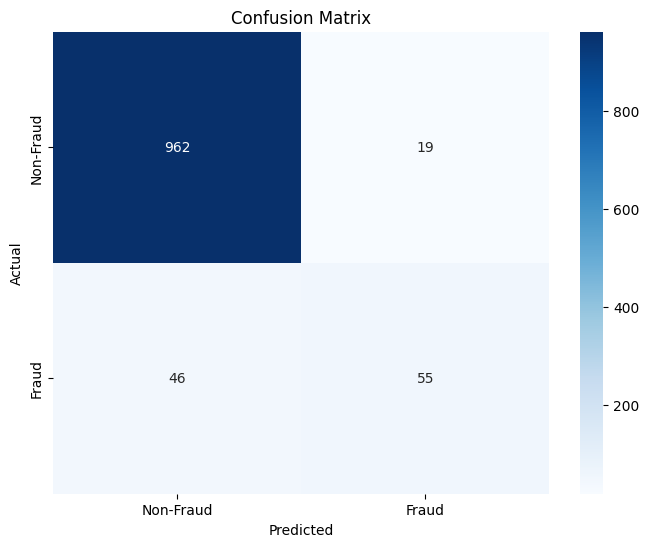

Precision: 0.74
Recall: 0.54
F1-Score: 0.63
ROC-AUC: 0.95
PR-AUC: 0.67


In [21]:
# Get predictions and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Display metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print(f"PR-AUC: {pr_auc:.2f}")

## Step 5: Error Analysis

Analyze errors (False Positives and False Negatives) to understand model limitations.

In [25]:
# Create a DataFrame for result analysis
results = X_test.copy()
results['Actual'] = y_test
results['Predicted'] = y_pred
results['Probability'] = y_prob

# False Positives
false_positives = results[(results['Actual'] == 0) & (results['Predicted'] == 1)]
print("False Positives:\n", false_positives.head())

# False Negatives
false_negatives = results[(results['Actual'] == 1) & (results['Predicted'] == 0)]
print("False Negatives:\n", false_negatives.head())

False Positives:
      TotalClaimCount  TotalInscClaimAmtReimbursed  AvgInscClaimAmtReimbursed  \
74          1.338250                     1.143298                  -0.247614   
78         -0.231702                     0.931082                   2.101021   
405         0.142464                     3.616897                   1.727312   
492        -0.358995                    -0.371708                  -0.331494   
591         0.929368                     0.409165                  -0.329995   

     TotalDeductibleAmtPaid  AvgDeductibleAmtPaid  UniqueBeneficiaryCount  \
74                 0.775931             -0.315008                1.486596   
78                 0.952163              2.207804               -0.228257   
405                4.514187              2.357879                0.445702   
492               -0.323130             -0.509737               -0.452911   
591                0.110944             -0.408781                0.423237   

     AvgClaimDuration  AvgLengthOfStay

## Step 6: Real-World Implications

Quantify the financial impact of False Positives and False Negatives using a cost-based analysis.

In [26]:
# Costs of errors
false_positive_cost = 500  # Example investigation cost
false_negative_cost = 3000  # Example missed fraud cost

fp = np.sum((y_test == 0) & (y_pred == 1))
fn = np.sum((y_test == 1) & (y_pred == 0))

total_fp_cost = fp * false_positive_cost
total_fn_cost = fn * false_negative_cost

print(f"Total False Positive Cost: ${total_fp_cost:,}")
print(f"Total False Negative Cost: ${total_fn_cost:,}")

Total False Positive Cost: $9,500
Total False Negative Cost: $138,000


In [27]:
# False Positive Analysis: Compare feature averages between false positives and correct non-fraud predictions
fp_features = false_positives.mean()
correct_non_fraud = results[(results['Actual'] == 0) & (results['Predicted'] == 0)].mean()

print("Feature averages for False Positives:")
print(fp_features)

print("\nFeature averages for Correct Non-Fraud predictions:")
print(correct_non_fraud)

# False Negative Analysis: Compare feature averages between false negatives and correct fraud predictions
fn_features = false_negatives.mean()
correct_fraud = results[(results['Actual'] == 1) & (results['Predicted'] == 1)].mean()

print("\nFeature averages for False Negatives:")
print(fn_features)

print("\nFeature averages for Correct Fraud predictions:")
print(correct_fraud)

Feature averages for False Positives:
TotalClaimCount                0.713152
TotalInscClaimAmtReimbursed    1.410749
AvgInscClaimAmtReimbursed      0.448297
TotalDeductibleAmtPaid         1.338629
AvgDeductibleAmtPaid           0.494294
UniqueBeneficiaryCount         0.834313
AvgClaimDuration               0.501505
AvgLengthOfStay                0.790026
NumChronicConditions_Mean      0.522098
Actual                         0.000000
Predicted                      1.000000
Probability                    0.753804
dtype: float64

Feature averages for Correct Non-Fraud predictions:
TotalClaimCount               -0.102813
TotalInscClaimAmtReimbursed   -0.203859
AvgInscClaimAmtReimbursed     -0.069856
TotalDeductibleAmtPaid        -0.197238
AvgDeductibleAmtPaid          -0.095364
UniqueBeneficiaryCount        -0.110458
AvgClaimDuration              -0.031718
AvgLengthOfStay               -0.124972
NumChronicConditions_Mean     -0.051080
Actual                         0.000000
Predicted     

### Error Analysis Findings

#### 1. Insights from False Positives (Legitimate providers flagged as fraud):
- **Key Features**:
  - `TotalClaimCount`, `TotalInscClaimAmtReimbursed`, and `AvgDeductibleAmtPaid` values are higher for False Positives compared to correctly predicted Non-Fraud cases.
  - The model seems to rely heavily on aggregate amounts without considering the context of legitimate claims.
- **Recommendation**:
  - Normalize aggregate features (e.g., `TotalClaimCount`, `AvgDeductibleAmtPaid`) by averages per provider or region to account for legitimate large-scale claims.
  - Introduce features that highlight irregular patterns (e.g., claim frequency anomalies).

#### 2. Insights from False Negatives (Fraudulent providers missed):
- **Key Features**:
  - `AvgLengthOfStay` and `TotalClaimCount` values are noticeably lower compared to correctly predicted Fraud cases.
  - Fraudulent cases with subtle feature intensities (e.g., smaller amounts and shorter durations) are being overlooked.
- **Recommendation**:
  - Focus on capturing subtle anomalies by adding derived features, such as:
    - Deviations from regional averages.
    - Temporal trends highlighting suspicious activity.
  - Adjust probability thresholds to increase fraud recall while balancing false positives.

#### 3. General Comments:
- Use cost analysis to determine the optimal probability threshold that minimizes total financial loss from False Positives and False Negatives.
- Consider combining Gradient Boosting with another model (e.g., Random Forest) for improved generalization and identifying nuanced patterns.

These refinements aim to enhance the model's accuracy, especially in high-cost error cases.